# YOLOv8 Image Segmantation

## Preparation

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/YOLOv8/03_image_segmentation

/content/drive/MyDrive/YOLOv8/03_image_segmentation


In [4]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


## Test/Prediction

In [18]:
!yolo segment predict model=yolov8n-seg.pt source='https://ultralytics.com/images/bus.jpg'  # predict with official model

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/drive/MyDrive/YOLOv8/03_image_segmentation/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 373.9ms
Speed: 13.1ms preprocess, 373.9ms inference, 2042.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


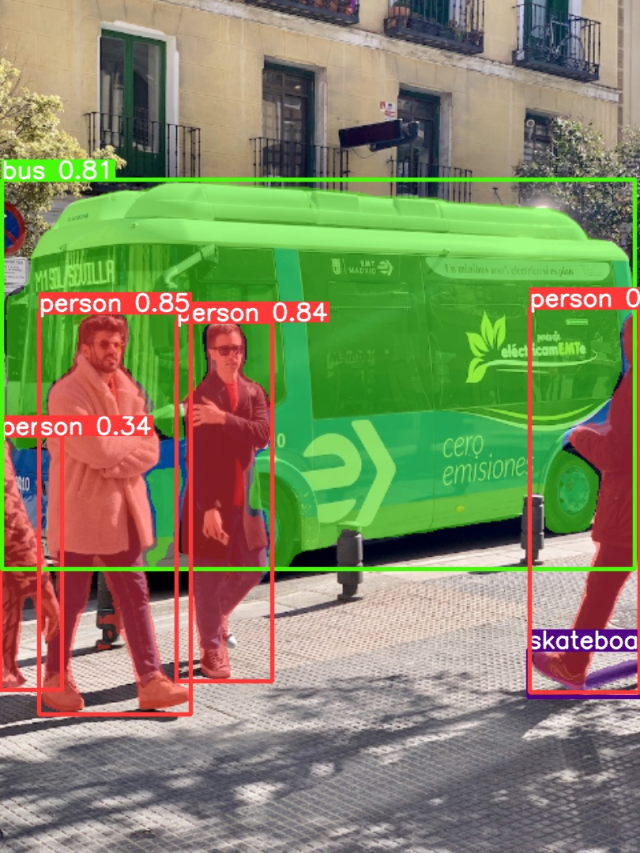

In [19]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

image_path = "runs/segment/predict/bus.jpg"
img =cv2.imread(image_path)
img = imutils.resize(img, width=640)
cv2_imshow(img)

## Python application

In [25]:
import cv2
import imutils
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

In [28]:
## data extraction block

def extract_data(img, model):
    h, w, ch = img.shape
    results = model.predict(source=img.copy(), save=False, save_txt=False)
    result = results[0]
    seg_contour_idx = []

    for mask in result.masks.xy:  # I use 'xy' attribute instead of "segments" because when I use segments I got error

      mask[:, 0] = mask[:, 0] * w
      mask[:, 1] = mask[:, 1] * h
      segment = np.array(mask, dtype=np.int32)
      seg_contour_idx.append(segment)


    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    class_ids = np.array(result.boxes.cls.cpu(), dtype="int")
    scores = np.array(result.boxes.conf.cpu(), dtype="float").round(2)
    class_names = result.names

    return bboxes, class_ids, seg_contour_idx, scores, class_names

#####################


0: 640x480 4 persons, 1 bus, 1 skateboard, 14.4ms
Speed: 2.9ms preprocess, 14.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 480)


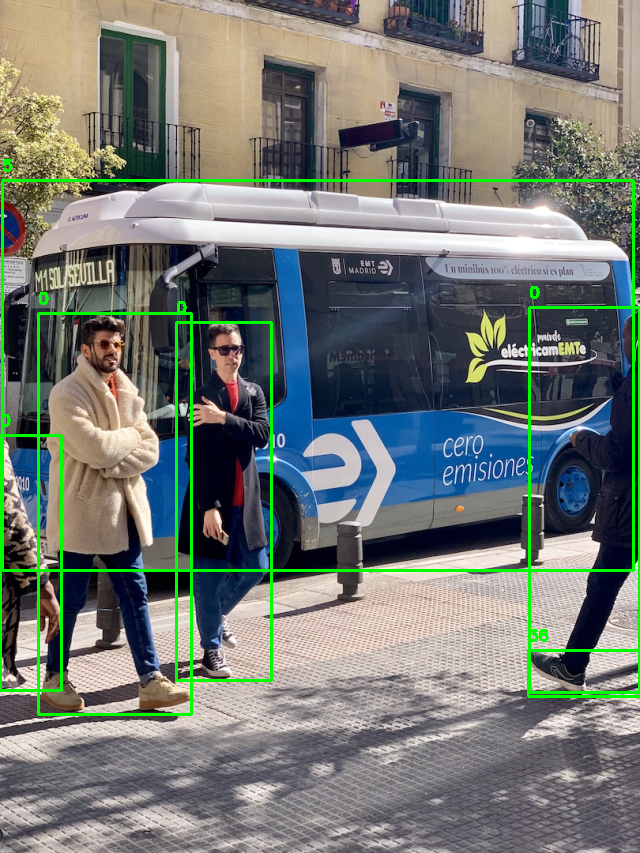

In [29]:
img_path = "/content/drive/MyDrive/YOLOv8/01_object_detection/bus.jpg"
model_path = "yolov8n-seg.pt"
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)
model = YOLO(model_path)

##data extraction block


bboxes, class_ids, seg_contour_idx, scores, class_names = extract_data(img, model)



for box, class_id, segmentation_id, score in zip(bboxes, class_ids, seg_contour_idx, scores):
  (xmin, ymin, xmax, ymax) = box
  cv2.rectangle (img, (xmin,ymin), (xmax,ymax), (0,255,0), 2)

  cv2.polylines(img, [segmentation_id], True, (255,0,0), 2)

  class_name = class_names[class_id]
  score= score*100
  text = f"{class_name}: %{score:.2f}"

  cv2.putText(img, str(class_id), (xmin, ymin-10), font, 0.5, (0,255,0), 2)

cv2_imshow(img)




## Training

In [5]:
!unzip /content/drive/MyDrive/YOLOv8/03_image_segmentation/data/car_part_dataset.zip -d data

Archive:  /content/drive/MyDrive/YOLOv8/03_image_segmentation/data/car_part_dataset.zip
   creating: data/car_part_dataset/images/
   creating: data/car_part_dataset/images/test/
  inflating: data/car_part_dataset/images/test/10.jpg  
  inflating: data/car_part_dataset/images/test/100.jpg  
  inflating: data/car_part_dataset/images/test/1015.jpg  
  inflating: data/car_part_dataset/images/test/1024.jpg  
  inflating: data/car_part_dataset/images/test/1028.jpg  
  inflating: data/car_part_dataset/images/test/1055.jpg  
  inflating: data/car_part_dataset/images/test/108.jpg  
  inflating: data/car_part_dataset/images/test/1084.jpg  
  inflating: data/car_part_dataset/images/test/1087.jpg  
  inflating: data/car_part_dataset/images/test/1099.jpg  
  inflating: data/car_part_dataset/images/test/1103.jpg  
  inflating: data/car_part_dataset/images/test/1126.jpg  
  inflating: data/car_part_dataset/images/test/113.jpg  
  inflating: data/car_part_dataset/images/test/1135.jpg  
  inflating: d

In [6]:
!yolo segment train data=/content/drive/MyDrive/YOLOv8/03_image_segmentation/data/config.yaml model=yolov8n-seg.pt epochs=20 imgsz=640 workers=8 batch=8 device=0 name=yolov8_car_part_segmantation

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/YOLOv8/03_image_segmentation/data/config.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_car_part_segmantation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

In [ ]:
#!yolo segment train model = "..../last.pt" resume True

## Test/Prediction

In [7]:
!yolo segment predict model=/content/drive/MyDrive/YOLOv8/03_image_segmentation/runs/segment/yolov8_car_part_segmantation/weights/best.pt source='/content/drive/MyDrive/YOLOv8/03_image_segmentation/data/car_part_dataset/images/test' save=True

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259819 parameters, 0 gradients, 12.0 GFLOPs

image 1/176 /content/drive/MyDrive/YOLOv8/03_image_segmentation/data/car_part_dataset/images/test/10.jpg: 640x640 1 front_bumper, 2 front_lights, 14.5ms
image 2/176 /content/drive/MyDrive/YOLOv8/03_image_segmentation/data/car_part_dataset/images/test/100.jpg: 640x640 1 back_door, 1 front_bumper, 1 front_door, 1 front_glass, 1 front_light, 1 hood, 33.3ms
image 3/176 /content/drive/MyDrive/YOLOv8/03_image_segmentation/data/car_part_dataset/images/test/1015.jpg: 640x640 2 back_bumpers, 1 back_glass, 2 back_lights, 10.3ms
image 4/176 /content/drive/MyDrive/YOLOv8/03_image_segmentation/data/car_part_dataset/images/test/1024.jpg: 640x640 1 back_door, 1 front_bumper, 1 front_door, 1 front_glass, 1 front_light, 1 hood, 10.2ms
image 5/176 /content/drive/MyDrive/YOLOv8/03_image_segmentation/data/car_part_dataset/images/test/

In [8]:
import cv2
import imutils
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

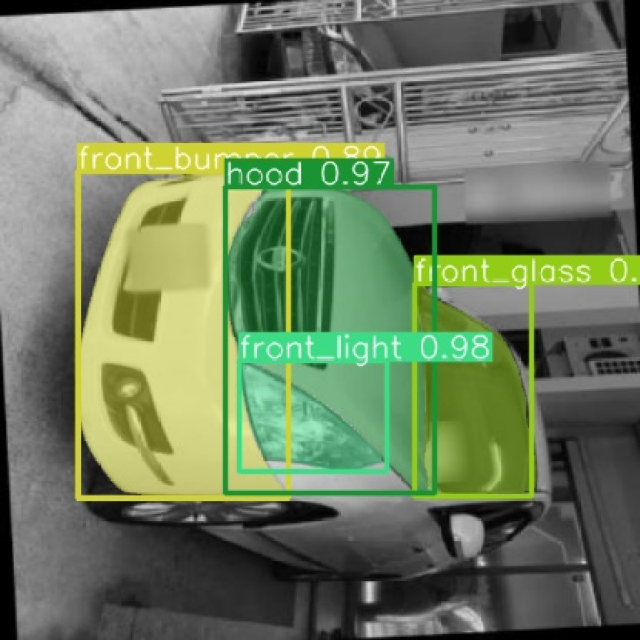

In [31]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

image_path = "/content/drive/MyDrive/YOLOv8/03_image_segmentation/runs/segment/predict3/1156.jpg" ## choosing image randomly
img =cv2.imread(image_path)
img = imutils.resize(img, width=640)
cv2_imshow(img)